# Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# load csv into dataframe
df = pd.read_csv("../Dataset/marketing_campaign.csv", sep='\t')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household 
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise (boolean)

Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (boolean)
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (boolean)
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (boolean)
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (boolean)
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (boolean)
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (boolean)
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
# viewing intial table
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


General Clean-up

In [3]:
#rename response column
df = df.rename(columns={'Response':'AcceptedCmp6'})

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
# format campaign columns

def campaign_reformater(data, columns):
    ''' function will: 
    1. Rename campaign columns to just the number
    2. Replace 1s with new column name
    3. Reorder the columns numerically
    4. Create a column that captures the first campaign
    5. Create a column that counts the amount of campaigns responded to
    6. Drop the campaign columns'''
    
    # create copy of dataframe
    df_transform = df.copy()
    
    # create rename map
    rename_map = {col: col[-1] for col in columns if col in  df_transform.columns}
    
    # apply rename map to rename columns
    df_transform =  df_transform.rename(columns=rename_map)
    
    # replace 1s with new column name in columns
    for new_name in rename_map.values():
        df_transform[new_name] =  df_transform[new_name].apply(lambda x: new_name if x==1 else x)
        
    # reorder columns
    reordered_cols = [col for col in ['1', '2', '3', '4', '5', '6'] if col in  df_transform.columns]
    
    # create column with first non zero value from campaign columns
    def first_value(row):
        for col in reordered_cols:
            val = row[col]
            if val != 0:
                return val
        
    df_transform['first_responded_campaign'] =  df_transform.apply(first_value, axis=1)
    df_transform['first_responded_campaign'] =  df_transform['first_responded_campaign'].replace({None:0})
    
    # create column with count of campaign responded to
    def count_campaign(row):
        return sum(1 for col in reordered_cols
                   if row[col] != 0)
    df_transform['count_of_campaigns'] = df_transform.apply(count_campaign, axis=1)
    
    # drop extra columns
    df_transform = df_transform.drop(columns=['1','2','3','4','5','6'])
    
    
    return df_transform
    
    
df_transform = campaign_reformater(df,["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "AcceptedCmp6"])


In [5]:
df_transform

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,3,11,6,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,0,3,11,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,0,3,11,1,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,0,3,11,4,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,0,3,11,0,0


In [6]:
# combine Kidhome and Teenhome into Children column
df_transform['Children'] = df_transform['Kidhome'] + df_transform['Teenhome']
drops = ['Kidhome', 'Teenhome']
df_transform = df_transform.drop(drops, axis=1)

df_transform

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,8,10,4,7,0,3,11,6,1,0
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,1,1,2,5,0,3,11,0,0,2
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,...,8,2,10,4,0,3,11,0,0,0
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,...,2,0,4,6,0,3,11,0,0,1
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,5,3,6,5,0,3,11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,13-06-2013,46,709,43,182,...,9,3,4,5,0,3,11,0,0,1
2236,4001,1946,PhD,Together,64014.0,10-06-2014,56,406,0,30,...,8,2,5,7,0,3,11,1,1,3
2237,7270,1981,Graduation,Divorced,56981.0,25-01-2014,91,908,48,217,...,2,3,13,6,0,3,11,4,1,0
2238,8235,1956,Master,Together,69245.0,24-01-2014,8,428,30,214,...,6,5,10,3,0,3,11,0,0,1


In [7]:
# convert Year_Birth to age, considering the data became available July 2024

df_transform['Age'] = 2024 - df_transform['Year_Birth']
drops = ['Year_Birth']
df_transform = df_transform.drop(drops, axis=1)

df_transform

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age
0,5524,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,10,4,7,0,3,11,6,1,0,67
1,2174,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,1,2,5,0,3,11,0,0,2,70
2,4141,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,...,2,10,4,0,3,11,0,0,0,59
3,6182,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,...,0,4,6,0,3,11,0,0,1,40
4,5324,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,...,3,6,5,0,3,11,0,0,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,13-06-2013,46,709,43,182,42,...,3,4,5,0,3,11,0,0,1,57
2236,4001,PhD,Together,64014.0,10-06-2014,56,406,0,30,0,...,2,5,7,0,3,11,1,1,3,78
2237,7270,Graduation,Divorced,56981.0,25-01-2014,91,908,48,217,32,...,3,13,6,0,3,11,4,1,0,43
2238,8235,Master,Together,69245.0,24-01-2014,8,428,30,214,80,...,5,10,3,0,3,11,0,0,1,68


In [8]:
# convert dt_customer to tenure, considering the data became available July 2024

# format date as a string

df_transform['Dt_Customer'] = pd.to_datetime(
    df['Dt_Customer'], format='%d-%m-%Y')

# Set the reference date — for April 2024, choose any day (e.g., April 1)
reference_date = pd.to_datetime('2024-04-01')

# Calculate the number of days they've been a customer
df_transform['days_as_customer'] = (
    reference_date - df_transform['Dt_Customer']).dt.days

# drop the original date column
drops = ['Dt_Customer']
df_transform = df_transform.drop(drops, axis=1)

df_transform

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,...,4,7,0,3,11,6,1,0,67,4227
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,...,2,5,0,3,11,0,0,2,70,3677
2,4141,Graduation,Together,71613.0,26,426,49,127,111,21,...,10,4,0,3,11,0,0,0,59,3876
3,6182,Graduation,Together,26646.0,26,11,4,20,10,3,...,4,6,0,3,11,0,0,1,40,3703
4,5324,PhD,Married,58293.0,94,173,43,118,46,27,...,6,5,0,3,11,0,0,1,43,3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,709,43,182,42,118,...,4,5,0,3,11,0,0,1,57,3945
2236,4001,PhD,Together,64014.0,56,406,0,30,0,0,...,5,7,0,3,11,1,1,3,78,3583
2237,7270,Graduation,Divorced,56981.0,91,908,48,217,32,12,...,13,6,0,3,11,4,1,0,43,3719
2238,8235,Master,Together,69245.0,8,428,30,214,80,30,...,10,3,0,3,11,0,0,1,68,3720


In [9]:
# Rename purchases columns for easier readability and cleaner output

df_transform = df_transform.rename(columns={
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store'
})

# Rename product columns for easier readability and cleaner output
df_transform = df_transform.rename(columns={
    'MntWines': "Wines",
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

df_transform

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Store,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,...,4,7,0,3,11,6,1,0,67,4227
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,...,2,5,0,3,11,0,0,2,70,3677
2,4141,Graduation,Together,71613.0,26,426,49,127,111,21,...,10,4,0,3,11,0,0,0,59,3876
3,6182,Graduation,Together,26646.0,26,11,4,20,10,3,...,4,6,0,3,11,0,0,1,40,3703
4,5324,PhD,Married,58293.0,94,173,43,118,46,27,...,6,5,0,3,11,0,0,1,43,3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,709,43,182,42,118,...,4,5,0,3,11,0,0,1,57,3945
2236,4001,PhD,Together,64014.0,56,406,0,30,0,0,...,5,7,0,3,11,1,1,3,78,3583
2237,7270,Graduation,Divorced,56981.0,91,908,48,217,32,12,...,13,6,0,3,11,4,1,0,43,3719
2238,8235,Master,Together,69245.0,8,428,30,214,80,30,...,10,3,0,3,11,0,0,1,68,3720


In [10]:
# Rename arrays for column Marital_Status for better readability and cleaner output
df_transform['Marital_Status'] = df_transform['Marital_Status'].replace({
    'Divorced': 'Alone',
    'Single': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone',
    'Widow': 'Alone',
    'Married': 'In couple',
    'Together': 'In couple'
})

# Rename arrays for column Education for better readability and cleaner output
df_transform['Education'] = df_transform['Education'].replace({
    'Graducation': 'UnderGraduate',
    'Graduation': 'UnderGraduate', 
    'PhD': 'PostGraduate',
    'Master': 'PostGraduate',
    'Basic': 'UnderGraduate',
    '2n Cycle': 'UnderGraduate'
})

In [11]:
# Create a new feature column 'Total Spending' by summing all product spending columns
df_transform['Total Spending'] = (
    df_transform['Fish'] +
    df_transform['Fruits'] +
    df_transform['Gold'] +
    df_transform['Meat'] +
    df_transform['Sweets'] +
    df_transform['Wines']
)

df_transform

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending
0,5524,UnderGraduate,Alone,58138.0,58,635,88,546,172,88,...,7,0,3,11,6,1,0,67,4227,1617
1,2174,UnderGraduate,Alone,46344.0,38,11,1,6,2,1,...,5,0,3,11,0,0,2,70,3677,27
2,4141,UnderGraduate,In couple,71613.0,26,426,49,127,111,21,...,4,0,3,11,0,0,0,59,3876,776
3,6182,UnderGraduate,In couple,26646.0,26,11,4,20,10,3,...,6,0,3,11,0,0,1,40,3703,53
4,5324,PostGraduate,In couple,58293.0,94,173,43,118,46,27,...,5,0,3,11,0,0,1,43,3725,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UnderGraduate,In couple,61223.0,46,709,43,182,42,118,...,5,0,3,11,0,0,1,57,3945,1341
2236,4001,PostGraduate,In couple,64014.0,56,406,0,30,0,0,...,7,0,3,11,1,1,3,78,3583,444
2237,7270,UnderGraduate,Alone,56981.0,91,908,48,217,32,12,...,6,0,3,11,4,1,0,43,3719,1241
2238,8235,PostGraduate,In couple,69245.0,8,428,30,214,80,30,...,3,0,3,11,0,0,1,68,3720,843


Outlier Imputation

In [12]:
#using mean to replace outliers in Age and Income columns
mean_age = df_transform['Age'].mean()
df_transform.loc[df_transform['Age'] > 120, 'Age'] = mean_age #replace ridiculous ages

mean_income = df_transform['Income'].mean()
df_transform.loc[df_transform['Income'] > 200000, 'Income'] = mean_income #replace outrageous values
df_transform['Income'].fillna(df['Income'].mean(), inplace=True) #replace null values

df_transform

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\2513858637.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.19419642857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_transform.loc[df_transform['Age'] > 120, 'Age'] = mean_age #replace ridiculous ages
C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\2513858637.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transform['Inco

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending
0,5524,UnderGraduate,Alone,58138.0,58,635,88,546,172,88,...,7,0,3,11,6,1,0,67.0,4227,1617
1,2174,UnderGraduate,Alone,46344.0,38,11,1,6,2,1,...,5,0,3,11,0,0,2,70.0,3677,27
2,4141,UnderGraduate,In couple,71613.0,26,426,49,127,111,21,...,4,0,3,11,0,0,0,59.0,3876,776
3,6182,UnderGraduate,In couple,26646.0,26,11,4,20,10,3,...,6,0,3,11,0,0,1,40.0,3703,53
4,5324,PostGraduate,In couple,58293.0,94,173,43,118,46,27,...,5,0,3,11,0,0,1,43.0,3725,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UnderGraduate,In couple,61223.0,46,709,43,182,42,118,...,5,0,3,11,0,0,1,57.0,3945,1341
2236,4001,PostGraduate,In couple,64014.0,56,406,0,30,0,0,...,7,0,3,11,1,1,3,78.0,3583,444
2237,7270,UnderGraduate,Alone,56981.0,91,908,48,217,32,12,...,6,0,3,11,4,1,0,43.0,3719,1241
2238,8235,PostGraduate,In couple,69245.0,8,428,30,214,80,30,...,3,0,3,11,0,0,1,68.0,3720,843


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! CLUSTERING !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [13]:
#copy the transformed dataframe to create a separate clustering dataframe
df_clustering= df_transform.copy()

df_clustering

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending
0,5524,UnderGraduate,Alone,58138.0,58,635,88,546,172,88,...,7,0,3,11,6,1,0,67.0,4227,1617
1,2174,UnderGraduate,Alone,46344.0,38,11,1,6,2,1,...,5,0,3,11,0,0,2,70.0,3677,27
2,4141,UnderGraduate,In couple,71613.0,26,426,49,127,111,21,...,4,0,3,11,0,0,0,59.0,3876,776
3,6182,UnderGraduate,In couple,26646.0,26,11,4,20,10,3,...,6,0,3,11,0,0,1,40.0,3703,53
4,5324,PostGraduate,In couple,58293.0,94,173,43,118,46,27,...,5,0,3,11,0,0,1,43.0,3725,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UnderGraduate,In couple,61223.0,46,709,43,182,42,118,...,5,0,3,11,0,0,1,57.0,3945,1341
2236,4001,PostGraduate,In couple,64014.0,56,406,0,30,0,0,...,7,0,3,11,1,1,3,78.0,3583,444
2237,7270,UnderGraduate,Alone,56981.0,91,908,48,217,32,12,...,6,0,3,11,4,1,0,43.0,3719,1241
2238,8235,PostGraduate,In couple,69245.0,8,428,30,214,80,30,...,3,0,3,11,0,0,1,68.0,3720,843


Scaling & Encoding for Clustering

In [14]:
# Columns to scale
scale_cols = [
    'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
    'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
    'Age', 'Total Spending', 'count_of_campaigns', 'first_responded_campaign', 'days_as_customer'
]

# Initialize scaler
scaler = StandardScaler()

# Scale and replace the values in-place
df_clustering[scale_cols] = scaler.fit_transform(df_clustering[scale_cols])

df_clustering

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending
0,5524,UnderGraduate,Alone,0.288072,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,0.693904,0,3,11,2.700576,0.621248,0,1.017967,1.531185,1.679417
1,2174,UnderGraduate,Alone,-0.263023,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.130463,0,3,11,-0.524565,-0.501912,2,1.274564,-1.190545,-0.961275
2,4141,UnderGraduate,In couple,0.917714,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.542647,0,3,11,-0.524565,-0.501912,0,0.333707,-0.205773,0.282673
3,6182,UnderGraduate,In couple,-1.183445,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0.281720,0,3,11,-0.524565,-0.501912,1,-1.291410,-1.061881,-0.918094
4,5324,PostGraduate,In couple,0.295315,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.130463,0,3,11,-0.524565,-0.501912,1,-1.034813,-0.953012,-0.305254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,UnderGraduate,In couple,0.432224,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,...,-0.130463,0,3,11,-0.524565,-0.501912,1,0.162642,0.135680,1.221032
2236,4001,PostGraduate,In couple,0.562638,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,...,0.693904,0,3,11,0.012958,0.621248,3,1.958824,-1.655713,-0.268717
2237,7270,UnderGraduate,Alone,0.234009,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,...,0.281720,0,3,11,1.625529,0.621248,0,-1.034813,-0.982703,1.054951
2238,8235,PostGraduate,In couple,0.807065,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,...,-0.954831,0,3,11,-0.524565,-0.501912,1,1.103499,-0.977755,0.393948


In [15]:
# encode the categorical variables, Education and Marital_Status, to be on 0-1 scale

df_clustering['Education'] = df_clustering['Education'].astype('category').cat.codes
df_clustering['Marital_Status'] = df_clustering['Marital_Status'].astype('category').cat.codes

df_clustering


,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending
0,5524,1,0,0.288072,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,0.693904,0,3,11,2.700576,0.621248,0,1.017967,1.531185,1.679417
1,2174,1,0,-0.263023,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.130463,0,3,11,-0.524565,-0.501912,2,1.274564,-1.190545,-0.961275
2,4141,1,1,0.917714,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.542647,0,3,11,-0.524565,-0.501912,0,0.333707,-0.205773,0.282673
3,6182,1,1,-1.183445,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0.281720,0,3,11,-0.524565,-0.501912,1,-1.291410,-1.061881,-0.918094
4,5324,0,1,0.295315,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.130463,0,3,11,-0.524565,-0.501912,1,-1.034813,-0.953012,-0.305254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1,1,0.432224,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,...,-0.130463,0,3,11,-0.524565,-0.501912,1,0.162642,0.135680,1.221032
2236,4001,0,1,0.562638,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,...,0.693904,0,3,11,0.012958,0.621248,3,1.958824,-1.655713,-0.268717
2237,7270,1,0,0.234009,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,...,0.281720,0,3,11,1.625529,0.621248,0,-1.034813,-0.982703,1.054951
2238,8235,0,1,0.807065,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,...,-0.954831,0,3,11,-0.524565,-0.501912,1,1.103499,-0.977755,0.393948


Final data frames

In [16]:
# Create a final feature list for Clustering

# drop useless columns Z_CostContact and Z_Revenue
drops = ['Z_CostContact', 'Z_Revenue']
df_clustering = df_clustering.drop(drops, axis=1)

# Save IDs for later use
customer_ids = df_clustering['ID'].copy()

# Drop ID column before clustering
df_clustering = df_clustering.drop(['ID'], axis=1)

df_clustering.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'Web', 'Catalog',
       'Store', 'NumWebVisitsMonth', 'Complain', 'first_responded_campaign',
       'count_of_campaigns', 'Children', 'Age', 'days_as_customer',
       'Total Spending'],
      dtype='object')

READY TO GO

In [19]:
# clustering happens here

In [17]:
## Create a empty list to store the k and WSSD values
results = []

# Loop through values of k from 1 to 19
for k in range(1, 20):
    # Initialize and fit the KMeans model
    elbow_kmeans = KMeans(n_clusters=k, random_state=0)
    elbow_kmeans.fit(df_clustering)

    # Store k and WSSD
    results.append({"k": k, "wssd": elbow_kmeans.inertia_})

# Create the DataFrame
df_clustering_ks = pd.DataFrame(results)

c:\Users\Caro Crespo\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Caro Crespo\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Caro Crespo\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Caro Crespo\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

In [21]:
df_clustering_ks

,k,wssd
0,1,42648.324107
1,2,30047.107880
2,3,26997.952312
3,4,25416.113051
4,5,24373.810401
5,6,23434.673754
6,7,22792.198506
7,8,22069.248325
8,9,21470.305341
9,10,20939.491592


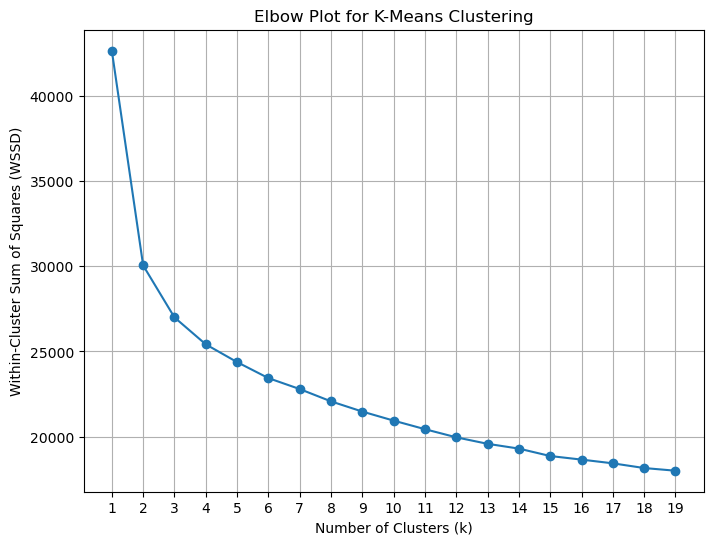

In [18]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(df_clustering_ks['k'], df_clustering_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(df_clustering_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [19]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(df_clustering)

c:\Users\Caro Crespo\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Create a copy of the DataFrame for clustering and modification
df_with_clusters = df_clustering.copy()

# Add cluster labels to the copied DataFrame
df_with_clusters['Cluster'] = clusters.labels_

# Display the updated DataFrame with the 'Cluster' column
df_with_clusters

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Store,NumWebVisitsMonth,Complain,first_responded_campaign,count_of_campaigns,Children,Age,days_as_customer,Total Spending,Cluster
0,1,0,0.288072,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.550785,0.693904,0,2.700576,0.621248,0,1.017967,1.531185,1.679417,2
1,1,0,-0.263023,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-1.166125,-0.130463,0,-0.524565,-0.501912,2,1.274564,-1.190545,-0.961275,1
2,1,1,0.917714,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,1.295237,-0.542647,0,-0.524565,-0.501912,0,0.333707,-0.205773,0.282673,0
3,1,1,-1.183445,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.550785,0.281720,0,-0.524565,-0.501912,1,-1.291410,-1.061881,-0.918094,1
4,0,1,0.295315,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.064556,-0.130463,0,-0.524565,-0.501912,1,-1.034813,-0.953012,-0.305254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,0.432224,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,...,-0.550785,-0.130463,0,-0.524565,-0.501912,1,0.162642,0.135680,1.221032,0
2236,0,1,0.562638,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,...,-0.243114,0.693904,0,0.012958,0.621248,3,1.958824,-1.655713,-0.268717,0
2237,1,0,0.234009,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,...,2.218248,0.281720,0,1.625529,0.621248,0,-1.034813,-0.982703,1.054951,2
2238,0,1,0.807065,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,...,1.295237,-0.954831,0,-0.524565,-0.501912,1,1.103499,-0.977755,0.393948,0


In [21]:
plt.style.use("dark_background")

In [22]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
  """
  Helper function to create scatter plots for all possible pairs of features.
  Parameters:
  - data: DataFrame containing the features to be plotted.
  - feature_names: List of feature names to be used in plotting.
  - color_labels: Optional. Cluster or class labels to color the scatter plots.
  - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
  """
  # Create a figure for the scatter plots
  plt.figure(figsize=(60, 60))
  # Counter for subplot index
  plot_number = 1
  # Loop through each pair of features
  for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
      plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
      # Scatter plot colored by labels if provided
      if color_labels is not None:
        plt.scatter(data[feature_names[i]], data[feature_names[j]],
              c=color_labels, cmap='viridis', alpha=0.7)
      else:
        plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
      plt.xlabel(feature_names[i])
      plt.ylabel(feature_names[j])
      plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
      # Increment the plot number
      plot_number += 1
  # Adjust layout to prevent overlap
  plt.tight_layout()
  # Show the plot
  plt.show()
# Get feature names
feature_names = df_clustering.columns
# Use the helper function to plot scatter plots without coloring by cluster labels
#plot_feature_pairs(df_clustering, feature_names, title_prefix='Original Data: ')
plot_feature_pairs(df_with_clusters, feature_names, color_labels=df_with_clusters['Cluster'], title_prefix='Clustered Data: ')

KeyboardInterrupt: 

In [23]:
# First, make a DataFrame of IDs and Clusters
df_cluster_labels = pd.DataFrame({
    'ID': customer_ids,
    'Cluster': df_with_clusters['Cluster']
})

# Merge the clusters into the original (pre-scaled) DataFrame
df_post = df_transform.merge(df_cluster_labels, on='ID', how='left')

df_post = df_post.drop(columns=['Cluster_y'])

df_post = df_post.rename(columns={'Cluster_x': 'Cluster'})

df_post


KeyError: "['Cluster_y'] not found in axis"

In [24]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2240 non-null   int64  
 1   Education                 2240 non-null   object 
 2   Marital_Status            2240 non-null   object 
 3   Income                    2240 non-null   float64
 4   Recency                   2240 non-null   int64  
 5   Wines                     2240 non-null   int64  
 6   Fruits                    2240 non-null   int64  
 7   Meat                      2240 non-null   int64  
 8   Fish                      2240 non-null   int64  
 9   Sweets                    2240 non-null   int64  
 10  Gold                      2240 non-null   int64  
 11  NumDealsPurchases         2240 non-null   int64  
 12  Web                       2240 non-null   int64  
 13  Catalog                   2240 non-null   int64  
 14  Store   

In [25]:

def mode_or_nan(x):
    m = x.mode()
    return m.iloc[0] if not m.empty else np.nan

# Define aggregation functions
agg_dict = {
    'Income': 'mean',
    'Recency': 'mean',
    'Wines': 'mean',
    'Fruits': 'mean',
    'Meat': 'mean',
    'Fish': 'mean',
    'Sweets': 'mean',
    'Gold': 'mean',
    'count_of_campaigns': 'mean',
    'NumDealsPurchases': 'mean',
    'Web': 'mean',
    'Catalog': 'mean',
    'Store': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Complain': 'mean',
    'Children': 'mean',
    'Age': 'mean',
    'days_as_customer': 'mean',
    'Total Spending': 'mean',
    'Education': mode_or_nan,
    'Marital_Status': mode_or_nan,
    'first_responded_campaign': mode_or_nan
}

# Apply groupby with agg dict
df_summary = df_post.groupby('Cluster').agg(agg_dict).reset_index()


In [26]:
df_summary

,Cluster,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,count_of_campaigns,...,Store,NumWebVisitsMonth,Complain,Children,Age,days_as_customer,Total Spending,Education,Marital_Status,first_responded_campaign
0,0,57867.695328,47.886513,464.713816,23.144737,137.097039,31.245066,24.728618,62.233553,0.396382,...,7.848684,5.796053,0.008224,1.151316,58.930921,3977.037829,743.162829,UnderGraduate,In couple,0
1,1,35573.209331,49.322672,44.364064,5.090310,23.442145,7.155221,5.098777,15.413923,0.168391,...,3.251176,6.381938,0.011289,1.227658,52.670168,3880.419567,100.564440,UnderGraduate,In couple,0
2,2,76312.028129,50.017575,617.066784,69.304042,466.949033,100.973638,70.590510,78.007030,1.021090,...,8.333919,2.813708,0.007030,0.217926,55.539884,3923.478032,1402.891037,UnderGraduate,In couple,0


In [27]:
df_summary.columns

Index(['Cluster', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'count_of_campaigns', 'NumDealsPurchases', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Children', 'Age',
       'days_as_customer', 'Total Spending', 'Education', 'Marital_Status',
       'first_responded_campaign'],
      dtype='object')

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\447340813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=cluster_column, y=col, ax=axes[i], palette='viridis')
C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\447340813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=cluster_column, y=col, ax=axes[i], palette='viridis')
C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\447340813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=cluster_column, y=col, ax=axes[i], palette='vi

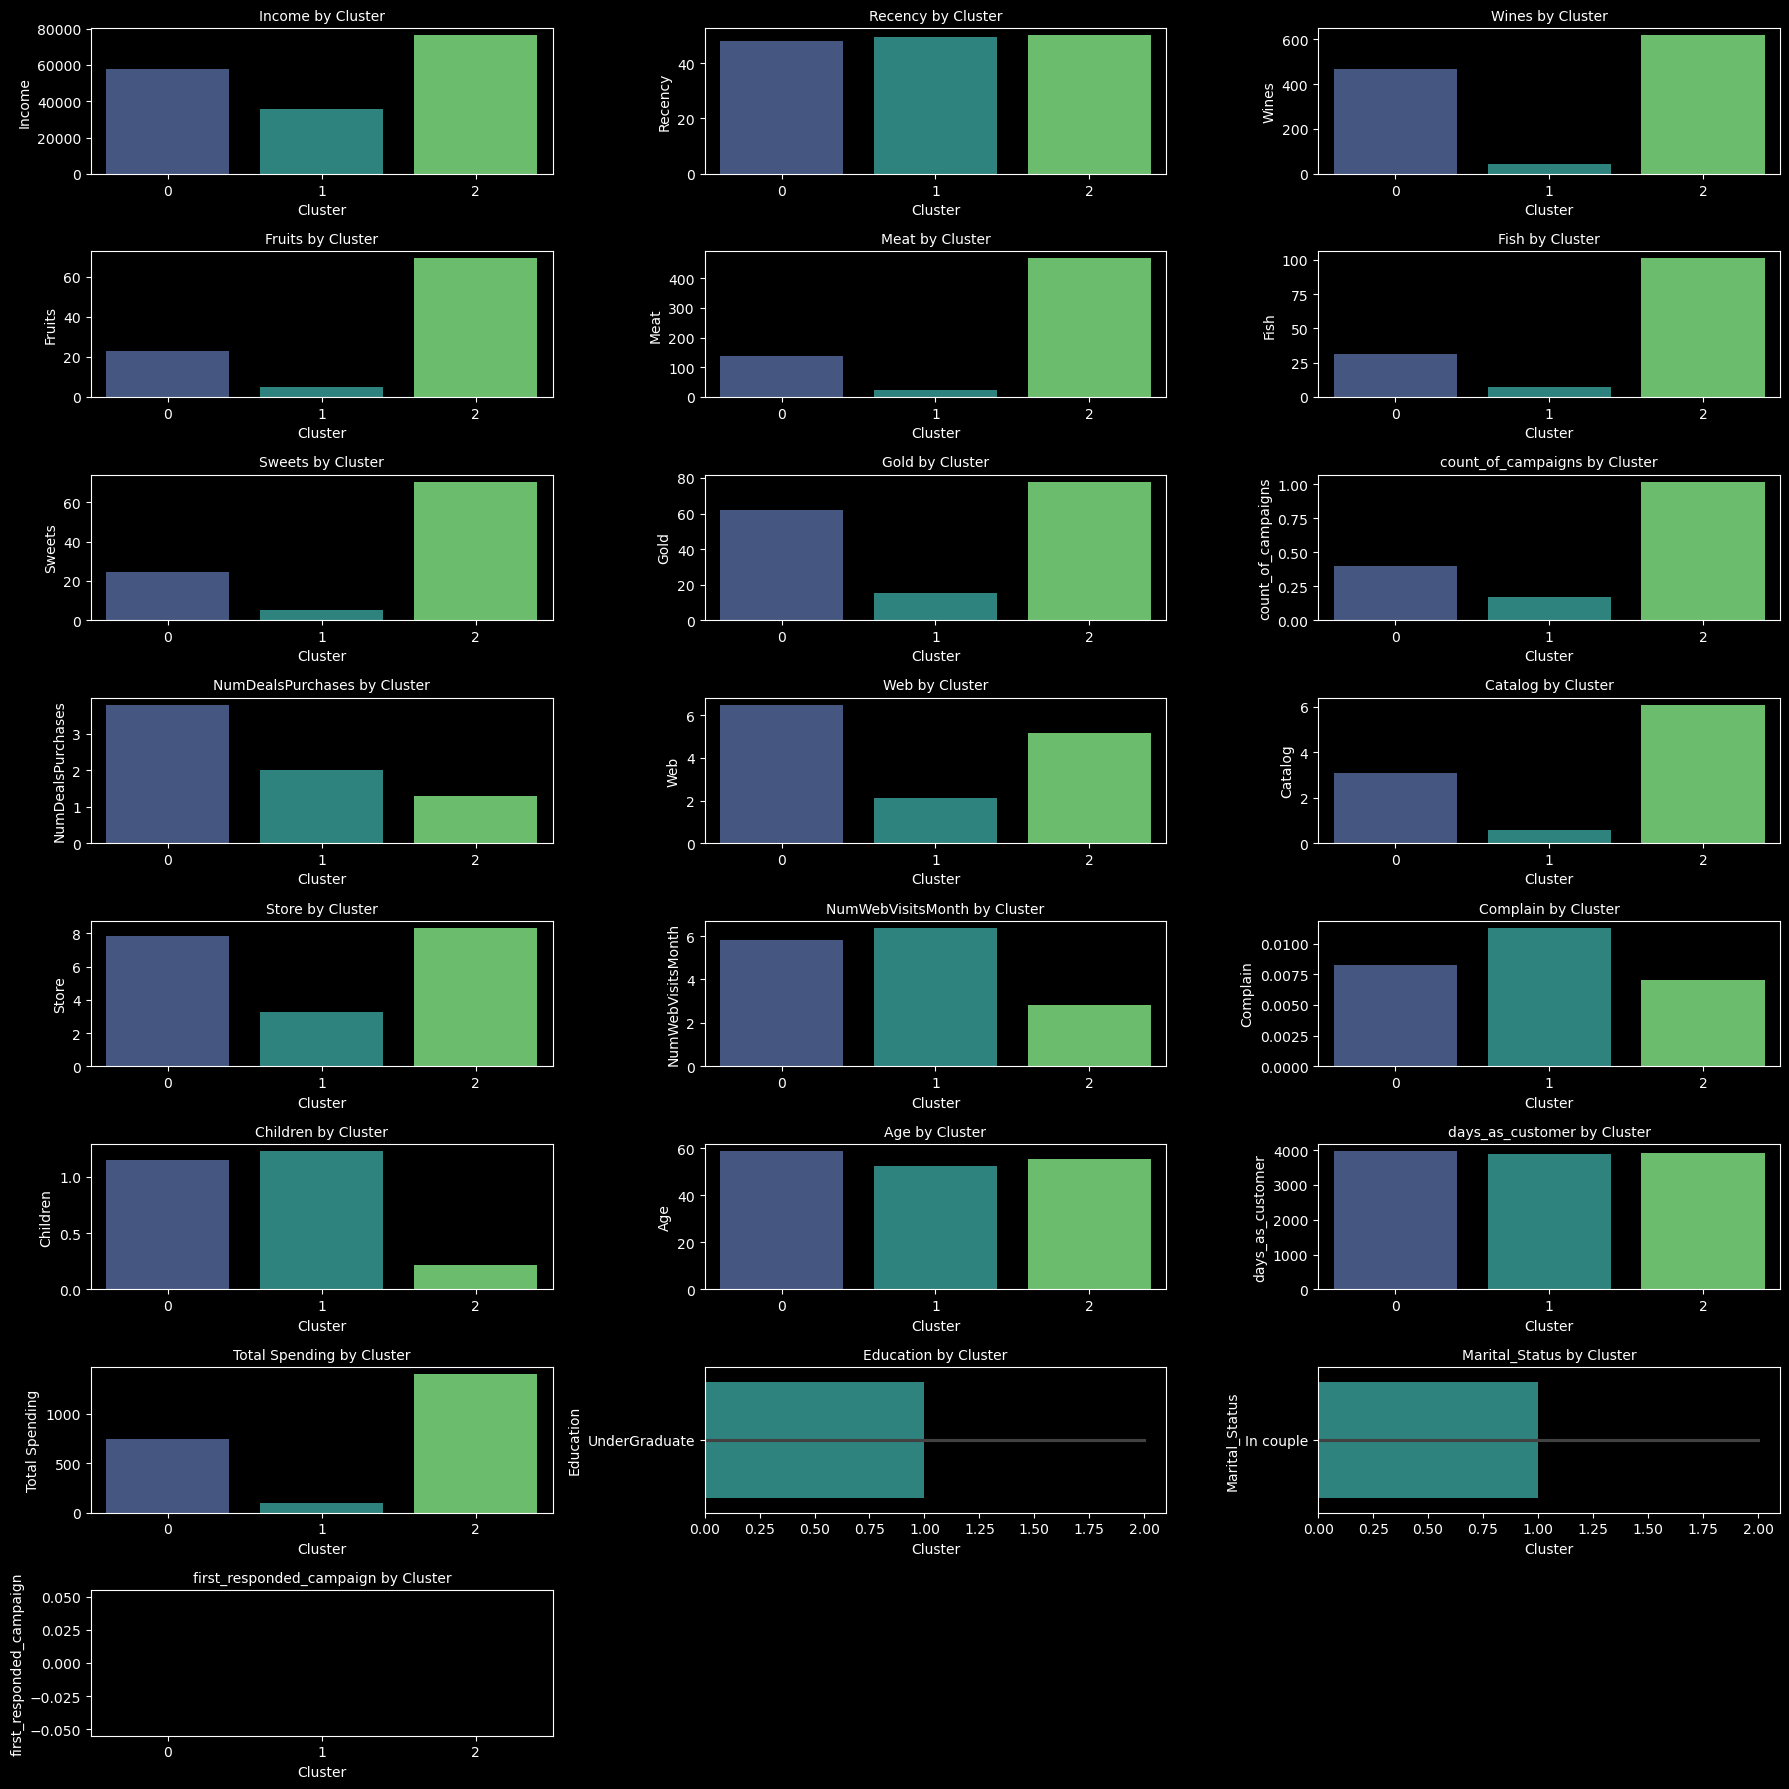

In [28]:
import math

def create_barplots_with_subplots(data, features, cluster_column, n_cols=3, figsize=(18, 18)):
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)

    # Create one figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of 2D grid

    for i, col in enumerate(features):
        sns.barplot(data=data, x=cluster_column, y=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{col} by Cluster', fontsize=10)
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    
features = [col for col in df_summary.columns if col != 'Cluster']

    
create_barplots_with_subplots(df_summary, features,'Cluster')

Some observations:
- There is a clear distinction between the incomes of the three
- accordingly, cluster 2 spends the most and cluster 1 spends the least
- spending on all categories of food is higher for cluster 2 compared to 1 or 0
- Interestingly, despite 2 spending the most, they make the least number of purchases. 0 makes the most
- 2 spends the most through the catalog, whereas 0 spends the most on web
- 1 has the largest number of web visits, 2 has the lowest
- It is very interesting to note that 2 has less children
- Education, Marital Status, Days as customer, and Recency do not appear to be different in the clusters


OH WE SHOULD CALCULATE AVG CART SIZE (total spending/ num of purchases)

Ideas for personas
0: Person with 1 or more children with income avg of $50K, married, likely to shop in person or online, closer to later 50s, moderately responsive to campaigns, likes buying gold and wine for some reason?
1: Person with 1 or more children (higher avg amount of children than 0), married, avg income of $33K ish, purchases much more often but spends the least. Shops on the web and in store, has highest amoutn of web visits, least responsive to campaigns, late 40s to early 50s, more likely to complain but there are so few complaints honestly
2. Person much less likely to have children, married, 50s ish, shops by catalog and in person, less online, makes large purchases as supposed to many purchases, most likely to respond to campaigns.



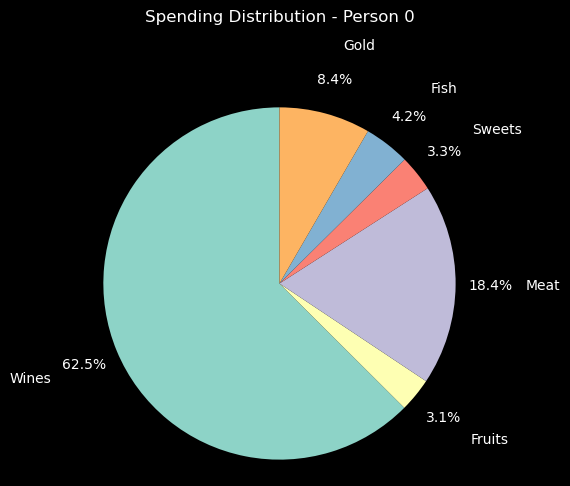

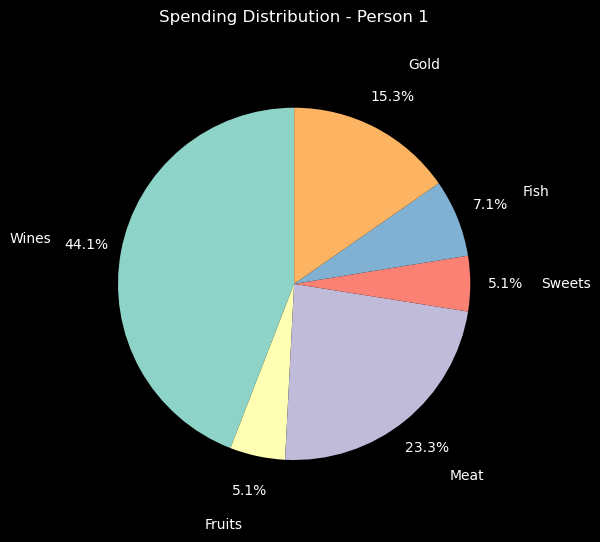

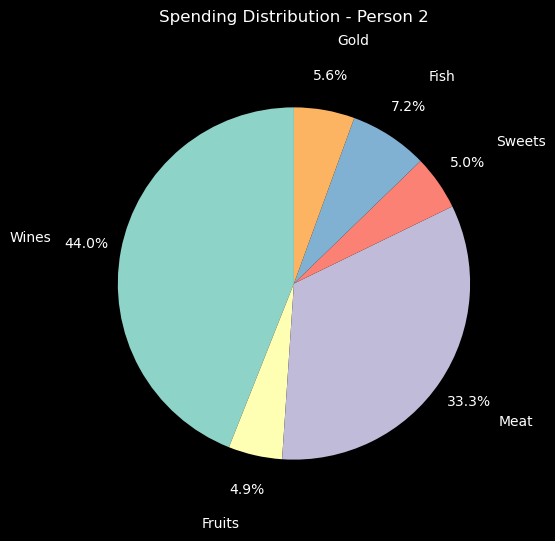

In [29]:
products = ["Wines", "Fruits", "Meat", "Sweets", "Fish", "Gold"]
df_products = df_summary[products]

for cluster in df_summary.index:
    plt.figure(figsize=(5, 5))
    plt.pie(df_products.loc[cluster], 
            labels=products, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=1.2,
            labeldistance=1.4,
             )
    plt.title(f'Spending Distribution - Person {cluster}',
              pad = 50
              )
    plt.axis('equal')
    plt.show()

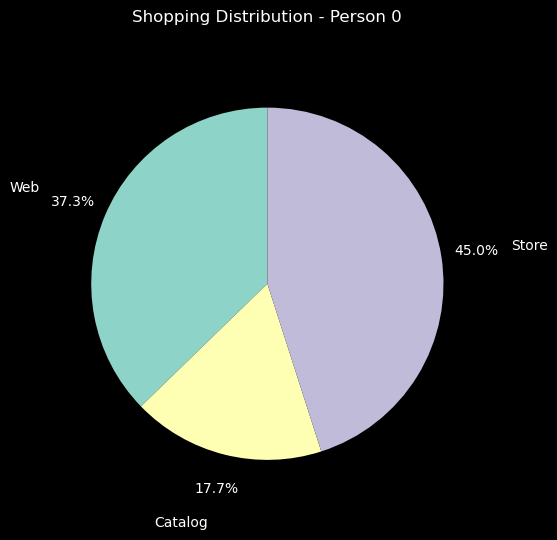

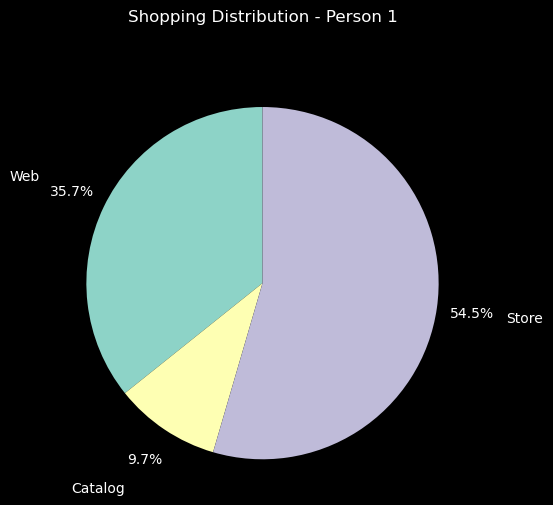

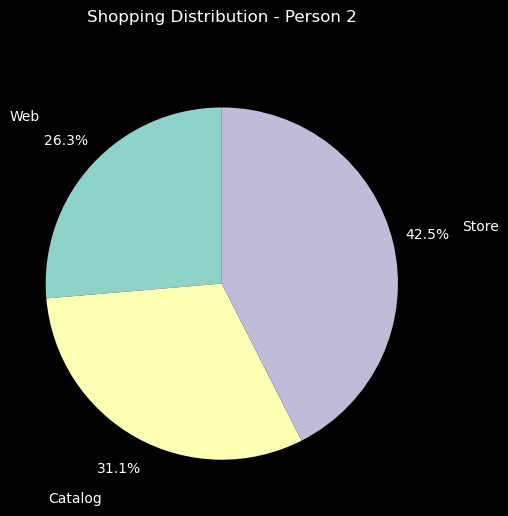

In [48]:
shops = ["Web", "Catalog", "Store"]
df_shops = df_summary[shops]

# Recorrer cada cluster (fila) y graficar
for cluster in df_summary.index:
    plt.figure(figsize=(5, 5))
    plt.pie(df_shops.loc[cluster], 
            labels=shops, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=1.2,
            labeldistance=1.4,
             )
    plt.title(f'Shopping Distribution - Person {cluster}',
              pad = 50
              )
    plt.axis('equal')
    plt.show()

In [39]:
import seaborn as sns

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\838227717.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


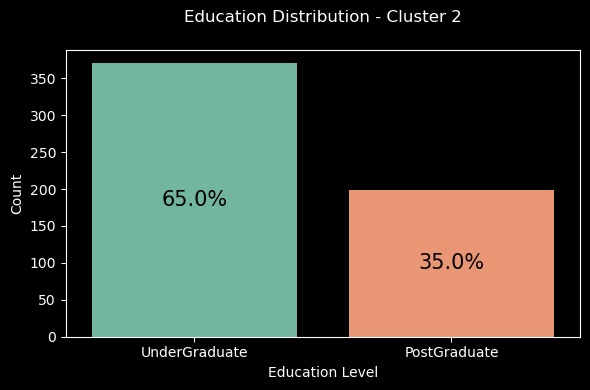

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\838227717.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


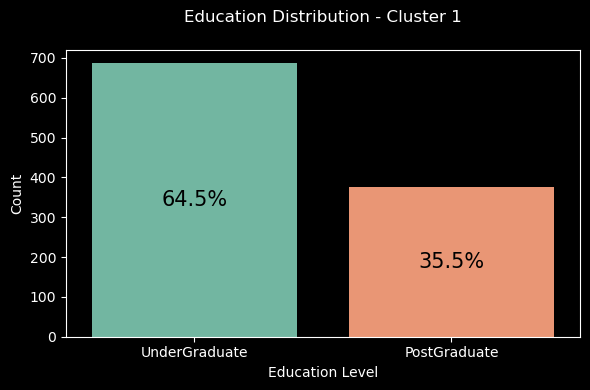

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\838227717.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


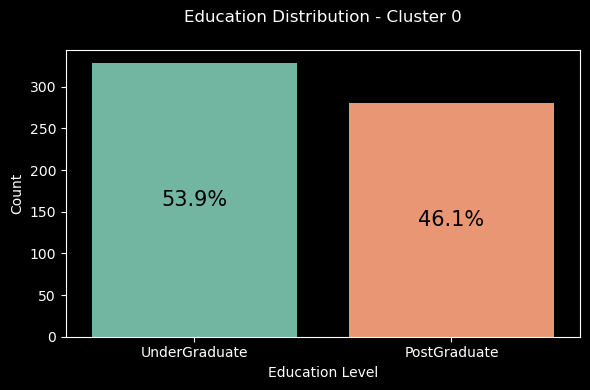

In [42]:

clusters = df_post["Cluster"].unique()

# Create a graph for each cluster according to Education
for cluster in clusters:
    df_cluster = df_post[df_post["Cluster"] == cluster]
    
    plt.figure(figsize=(6, 4))
    order = df_cluster["Education"].value_counts().index
    ax = sns.countplot(
        data=df_cluster,
        x="Education",
        order=order,
        palette="Set2"
    )
    #Calculate percent    
    total = len(df_cluster)
    for p in ax.patches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y * 0.5, 
                f'{percent:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=15, 
                color='black')

    plt.title(f'Education Distribution - Cluster {cluster}', pad=20)
    plt.xlabel("Education Level")
    plt.ylabel("Count")
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Create a graph for each cluster according to Marital_Status
for cluster in clusters:
    df_cluster = df_post[df_post["Cluster"] == cluster]
    
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cluster, 
                  x="Marital_Status", 
                  order=df_cluster["Marital_Status"].value_counts().index,
                  palette="Set2")
    plt.title(f'Marital status Distribution - Cluster {cluster}', pad=20)
    plt.xlabel("Marital status")
    plt.ylabel("Count")
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\51616311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


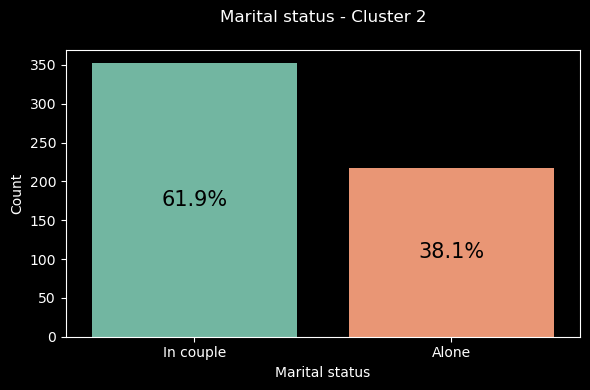

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\51616311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


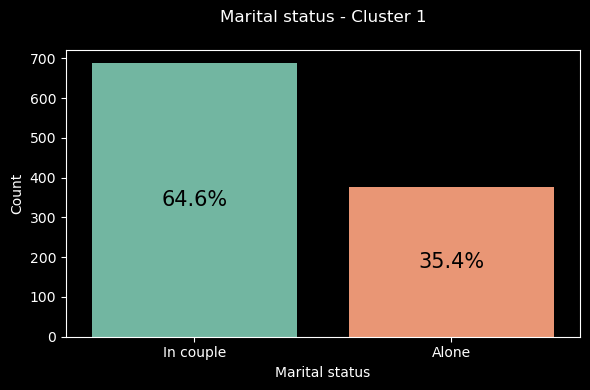

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\51616311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


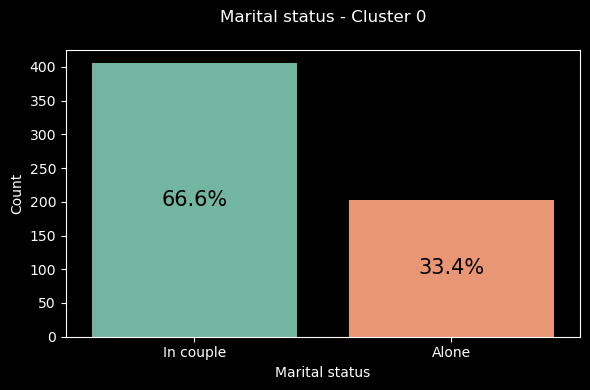

In [43]:
# Create a graph for each cluster according to Marital status
for cluster in clusters:
    df_cluster = df_post[df_post["Cluster"] == cluster]
    
    plt.figure(figsize=(6, 4))
    order = df_cluster["Marital_Status"].value_counts().index
    ax = sns.countplot(
        data=df_cluster,
        x="Marital_Status",
        order=order,
        palette="Set2"
    )
    #Calculate percent    
    total = len(df_cluster)
    for p in ax.patches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y * 0.5, 
                f'{percent:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=15, 
                color='black')

    plt.title(f'Marital status - Cluster {cluster}', pad=20)
    plt.xlabel("Marital status")
    plt.ylabel("Count")
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\1771097690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


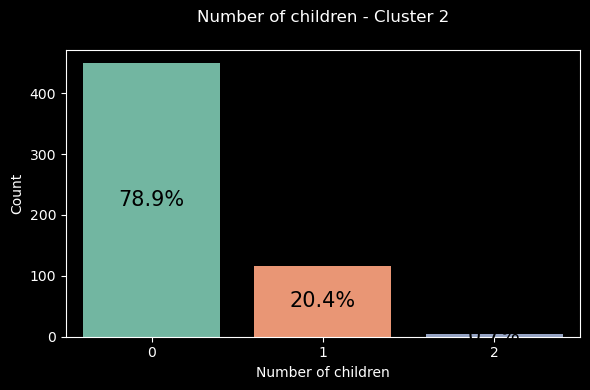

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\1771097690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


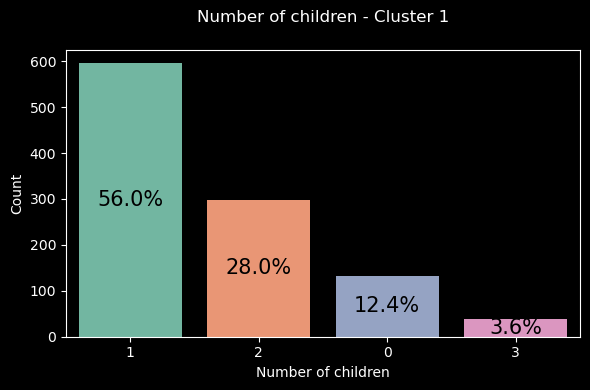

C:\Users\Caro Crespo\AppData\Local\Temp\ipykernel_7064\1771097690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


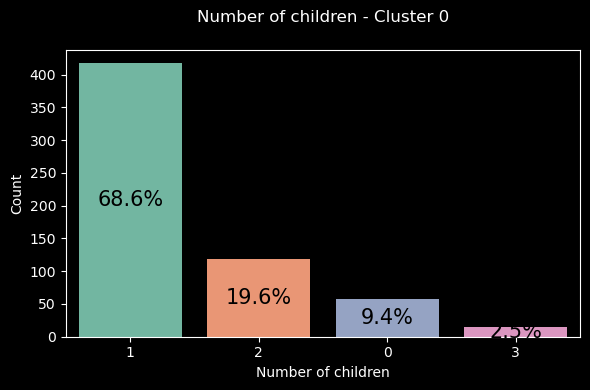

In [44]:
# Create a graph for each cluster according to Number of children
for cluster in clusters:
    df_cluster = df_post[df_post["Cluster"] == cluster]
    
    plt.figure(figsize=(6, 4))
    order = df_cluster["Children"].value_counts().index
    ax = sns.countplot(
        data=df_cluster,
        x="Children",
        order=order,
        palette="Set2"
    )
    #Calculate percent    
    total = len(df_cluster)
    for p in ax.patches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y * 0.5, 
                f'{percent:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=15, 
                color='black')

    plt.title(f'Number of children - Cluster {cluster}', pad=20)
    plt.xlabel("Number of children")
    plt.ylabel("Count")
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()